# Sensitivity Analysis Made Easy with the EMA Workbench

*Google Colab version*

This is the main notebook of the workshop on *sensitivity analysis* (SA) at the Social Simulation Festival 2021. Here we will demonstrate how to do Variance-based SA also know as [Sobol SA](https://en.wikipedia.org/wiki/Variance-based_sensitivity_analysis) on a relatively simple model [virus on network](https://ccl.northwestern.edu/netlogo/models/VirusonaNetwork). The idea is that you reuse (read copy-paste) this code your own model. Therefore, we tried to keep simple and avoid extensive side steps from.

This notebook is tuned to be run on [Google Colab](https://colab.research.google.com/) and has a couple of extra lines of code.
The core packages used in this notebook are [Mesa](https://mesa.readthedocs.io/en/stable/) to define an ABM model in Python, [EMA Workbench](https://emaworkbench.readthedocs.io/en/latest/) to design and run experiments, [SALib](https://salib.readthedocs.io/en/latest/) to conduct SA (within EMA Workbench). Also, we used one pretty plotting function of [pyNetLogo](https://pynetlogo.readthedocs.io/en/latest/).

The notebook follows a simplified SA workflow and has 5 sections-steps:

<img src="img/workflow.png"/>

## 0. Installations and imports

In [2]:
# Clone the repo to make its file available for Google Colab
!git clone https://github.com/BROSE-Uninc/SSF2021.git

fatal: destination path 'SSF2021' already exists and is not an empty directory.


In [3]:
# Install necessary packages
!pip install ema_workbench mesa ipyparallel SALib &> /dev/null

In [4]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random

# Import EMA Workbench modules
from ema_workbench import ReplicatorModel, RealParameter, BooleanParameter, IntegerParameter, Constant, TimeSeriesOutcome, perform_experiments, save_results, ema_logging

# Initialize logger to keep track of experiments run
ema_logging.log_to_stderr(ema_logging.INFO)

# Import Mesa virus on network model
from wolf_sheep import model

/Users/kleinraphael/opt/anaconda3/lib/python3.8/site-packages/ema_workbench/em_framework/optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


## 1. Load the model

The very first step of SA with EMA Workbench is to define or "load" the model as a function. That is, EMA Workbench treats all models as functions (read *black box*). They are supposed to have **inputs** (parameters, constants, uncertainties and policy levers) and **outputs** (outcomes, KPIs). The model structure is not interesting for EMA Workbench. It may be something simple as `def func(x)` which just returns x + 1.

In [5]:
# setting up the wolf-sheep model simulation as a function
def model_wolf_sheep(height=20,
                     width=20,
                     initial_sheep=100,
                     initial_wolves=50,
                     sheep_reproduce=0.04,
                     wolf_reproduce=0.05,
                     wolf_gain_from_food=20,
                     grass=False,
                     grass_regrowth_time=30,
                     sheep_gain_from_food=4,
                     steps=200):
    
    from wolf_sheep import model
    
    # Initialising the model
    wolf_sheep = model.WolfSheep(height=20,
                                   width=20,
                                   initial_sheep=100,
                                   initial_wolves=50,
                                   sheep_reproduce=0.04,
                                   wolf_reproduce=0.05,
                                   wolf_gain_from_food=20,
                                   grass=False,
                                   grass_regrowth_time=30,
                                   sheep_gain_from_food=4)
                
    # Run the model steps times
    wolf_sheep.run_model(steps)
    
    # Get model outcomes
    outcomes = wolf_sheep.datacollector.get_model_vars_dataframe()
    
    # Return model outcomes
    # below to be changed!
    return {'TIME' : list(range(steps + 1)),
            "Wolves" : outcomes["Wolves"].tolist(),
            "Sheep" : outcomes["Sheep"].tolist()}
    

Now, let's parameterize and test out our Mesa model. What is supposed to happen? First, we shouldn't get any error 😅. Second, after we run `model_wolf_sheep` function it has to give us a set of model outcomes. Let's try.

In [28]:
# Parametrize the model
height=20
width=20
initial_sheep=100
initial_wolves=50
sheep_reproduce=0.04
wolf_reproduce=0.05
wolf_gain_from_food=20
grass=False
grass_regrowth_time=30
sheep_gain_from_food=4
steps=200

model_wolf_sheep(height=height, 
                 width=width, 
                 initial_sheep=initial_sheep, 
                 initial_wolves=initial_wolves, 
                 sheep_reproduce=sheep_reproduce, 
                 wolf_reproduce=wolf_reproduce, 
                 wolf_gain_from_food=wolf_gain_from_food,
                 grass=grass,
                 grass_regrowth_time=grass_regrowth_time,
                 sheep_gain_from_food=sheep_gain_from_food,
                 steps=steps)

{'TIME': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  1

## 2. Design experiments

Now it's time to design experiments. What does it mean? Well, we have to specify:

* **which model parameters** aka *inputs* are we going to sample, what are their **ranges**, and random **distributions**,
* what we will keep as **constants** and do not change over the model run,
* and finally which **outcomes** we want to observe.

It's an important step in SA workflow and we have to be careful. Because if parameter ranges are too narrow or they're sampled from e.g. a Normal distribution, there is a chance that you'll overlook import model behavior. This is why model parameters are named **uncertainties** in the EMA Workbench. We often do not know parameter vales and how to explore many plausible options.

Now let's talk about "tech" part. First we have to initialize an instance of EMA Workbench called `ReplicatorModel`. This is how we "connect" EMA Workbench to our Python model. We have to pass a name of our model to `ReplicatorModel`, and also pass the function that we defined previously.

In [29]:
# Instantiate and pass the model 
model = ReplicatorModel('WolfSheep', function=model_wolf_sheep)

In [30]:
# Define model parameters and their ranges to be sampled
model.uncertainties = [RealParameter("sheep_reproduce", 0.01, 0.1),
                       RealParameter("wolf_reproduce", 0.02, 0.15),
                       RealParameter("wolf_gain_from_food", 5, 50),
                       RealParameter("grass_regrowth_time", 10, 50),
                       RealParameter("sheep_gain_from_food", 1, 8)]

In [31]:
# Define model parameters that will remain constant
model.constants = [Constant("height", height),
                  Constant('width', width),
                  Constant('initial_sheep', initial_sheep),
                  Constant('initial_wolves', initial_wolves),
                  Constant('grass', grass),
                  Constant('steps', steps)]

In [32]:
# Define model outcomes
model.outcomes = [TimeSeriesOutcome('TIME'),
                  TimeSeriesOutcome('Wolves'),
                  TimeSeriesOutcome('Sheep')]

In [33]:
# Define the number of replications
model.replications = 10

## 3. Run the model

In [34]:
# Run experiments with the aforementioned parameters and outputs
results = perform_experiments(model, 100)

[MainProcess/INFO] performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 10 cases completed
[MainProcess/INFO] 20 cases completed
[MainProcess/INFO] 30 cases completed
[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 50 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 70 cases completed
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 90 cases completed
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] experiments finished


In [35]:
# Get the results
experiments, outcomes = results

In [36]:
experiments.head()

,grass_regrowth_time,sheep_gain_from_food,sheep_reproduce,wolf_gain_from_food,wolf_reproduce,scenario,policy,model
0,42.448589,5.274321,0.052806,7.432280,0.142328,100,None,WolfSheep
1,49.667411,7.739344,0.036255,43.817806,0.094900,101,None,WolfSheep
2,17.379480,3.707284,0.024135,48.595853,0.036304,102,None,WolfSheep
3,42.931693,5.627437,0.031702,9.167377,0.140426,103,None,WolfSheep
4,46.457337,2.609435,0.080330,47.484082,0.067374,104,None,WolfSheep


In [37]:
outcomes.keys()

dict_keys(['TIME', 'Wolves', 'Sheep'])

In [38]:
from ema_workbench.util.utilities import save_results, load_results
import os

In [39]:
# Creaet a directory to store the results
directory = 'results/wolf_sheep'
if not os.path.exists(directory):
    os.makedirs(directory)

In [40]:
# Save the results
save_results(results, 'results/wolf_sheep/results.tar.gz')

[MainProcess/INFO] results saved successfully to /Users/kleinraphael/Documents/GitHub/SSF2021/results/wolf_sheep/results.tar.gz


In [41]:
# Load the results
results = load_results('results/wolf_sheep/results.tar.gz')

[MainProcess/INFO] results loaded succesfully from /Users/kleinraphael/Documents/GitHub/SSF2021/results/wolf_sheep/results.tar.gz


In [42]:
experiments, outcomes = results

### A bit of preprocessing

In [43]:
print(random.choice(list(outcomes)))
outcomes[random.choice(list(outcomes))].shape

TIME


(100, 10, 201)

In [44]:
mean_outcomes = {key:np.mean(outcomes[key],axis=1) for key in outcomes.keys()}
mean_results = (experiments.copy(), mean_outcomes)

In [45]:
# Now the shape of this array doesn't have 10 in it  
mean_outcomes[random.choice(list(outcomes))].shape

(100, 201)

### Visuals!

In [46]:
from ema_workbench.analysis.plotting import lines

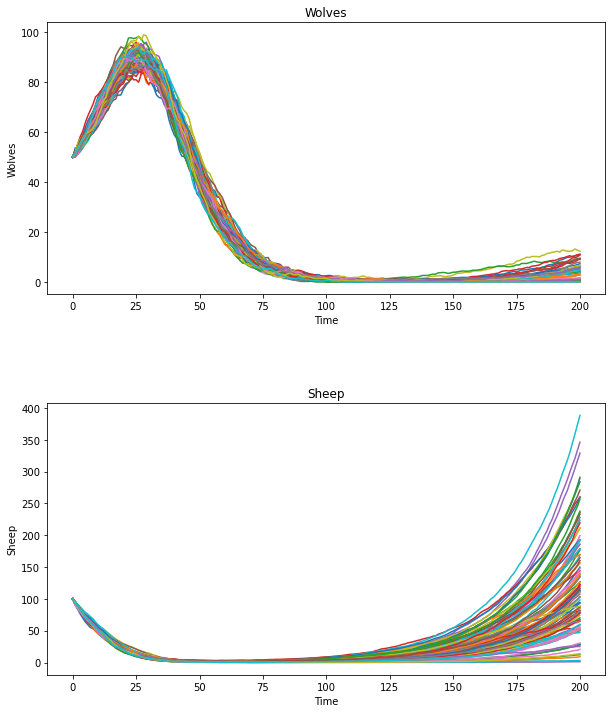

In [47]:
# plotting all of the results
plt.rcParams['figure.figsize'] = [10, 12]

figure = lines(experiments, mean_outcomes) #show lines, and end state density
plt.show()

## 4. Sensitivity analysis

In [48]:
from SALib.analyze import sobol
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from SSF2021.src.plot import plot_sobol_indices
sns.set_style('white')

In [49]:
# Specify the problem
problem = get_SALib_problem(model.uncertainties)

In [ ]:
# Select and normalize an outcome
normalized_outcomes = ...

In [ ]:
# Perform Sobol SA
Si = sobol.analyze(problem=problem, Y=normalized_resistant,
                   calc_second_order=True, print_to_console=False)

# Get scores by type 
Si_filter = {k:Si[k] for k in ['ST', 'ST_conf', 'S1', 'S1_conf']}

# Create a DataFrame out of them
Si_df = pd.DataFrame(Si_filter, index=problem['names'])

# Get indices and error bars
indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

In [ ]:
# Plot the results
fig, ax = plt.subplots(1)
indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)

In [ ]:
sns.set_style('whitegrid')
fig = plot_sobol_indices(Si, problem, criterion='ST', threshold=0.005)
fig.set_size_inches(7,7)
plt.show()